# Confusion Scheme on MNIST

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from keras.datasets import mnist
from scipy.signal import argrelextrema
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline 

## Data preparation

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

number_1 = 7
number_2 = 0

## Train set
x_train = x_train[(y_train == number_1) | (y_train == number_2)]
y_train = y_train[(y_train == number_1) | (y_train == number_2)]

X_m = x_train.astype(float)
y_m = y_train.astype(float)

X_m = X_m.reshape(X_m.shape[0], X_m.shape[1]**2)

#X_m = X_m[1:5000,:] # we truncate the data to have a faster program. Feel free to test with hole database
#y_m = y_m[1:5000]

## Test set
x_test = x_test[(y_test == number_1) | (y_test == number_2)]
y_test = y_test[(y_test == number_1) | (y_test == number_2)]

x_test = x_test.astype(float)
y_test = y_test.astype(float)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]**2)

## Linear Discriminatn Analysis (LDA)

Projection on to the first 2 linear discriminant components

In [3]:
print("Computing Linear Discriminant Analysis projection")
# Train
X2 = X_m.copy()
X2.flat[::X_m.shape[1] + 1] += 0.01  # Make X invertible
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y_m)


# Test
X3 = x_test.copy()
X3.flat[::x_test.shape[1] + 1] += 0.01  # Make X invertible
X_lda_test = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X3, y_test)

Computing Linear Discriminant Analysis projection


/home/gmunoz/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Neural Network

In [4]:
def build_model():
    model = Sequential()
    model.add(Dense(80, input_dim=X_m.shape[1], init='uniform', activation='sigmoid'))
    model.add(Dense(50, activation = 'sigmoid'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

## Confusion scheme

0


/home/gmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, input_dim=784, activation="sigmoid", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


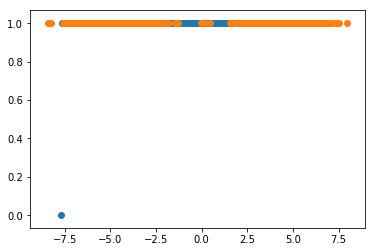

1


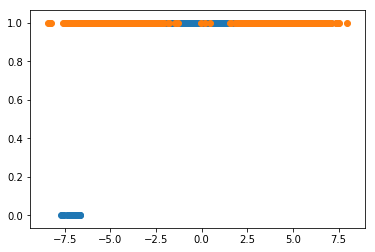

2


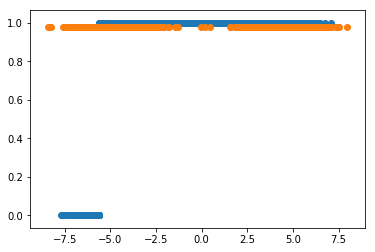

3


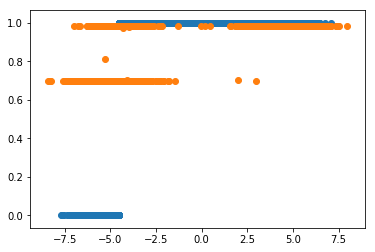

4


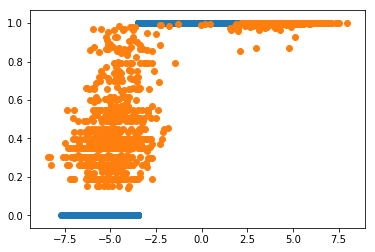

5


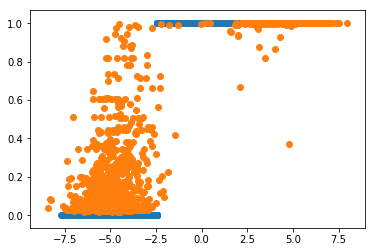

6


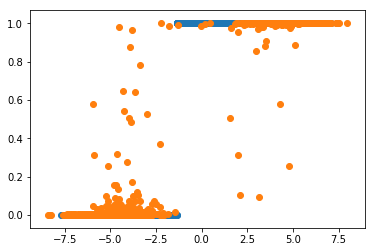

7


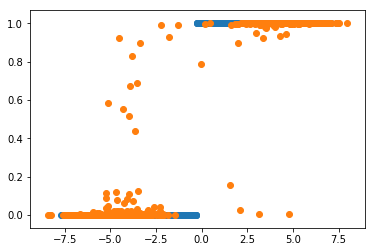

8


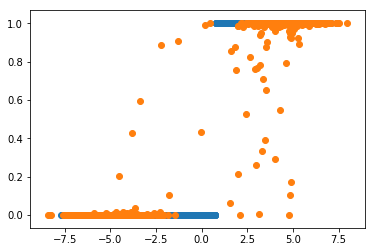

9


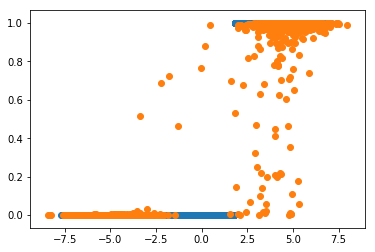

10


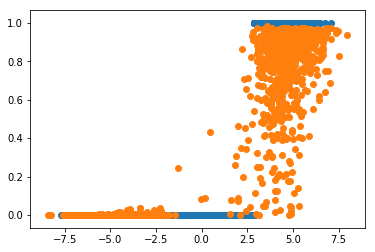

11


In [ ]:
# We go through the possible values of critical c
values_c = np.linspace(min(X_lda)[0], max(X_lda)[0], 15)

acc = []
count = 0
for c in values_c:
    print(np.where(values_c == c)[0][0])
    y_nn = np.zeros_like(y_m)
    y_nn[(X_lda[:,0] < c)] = 0 
    y_nn[(X_lda[:,0] > c)] = 1
         
    model = build_model()
    model.fit(X_m, y_nn, epochs=5, batch_size=10,  verbose=0)
    
    predictions = model.predict(x_test)
    
    y_nn_test = np.zeros_like(y_test)
    y_nn_test[(X_lda_test[:,0] < c)] = 0 
    y_nn_test[(X_lda_test[:,0] > c)] = 1
    
    plt.figure()
    plt.scatter(X_lda, y_nn)
    plt.scatter(X_lda_test, predictions)
    plt.show()
    
    acc.append(sum(abs(predictions[:,0] - y_nn_test)))


critical_value = values_c[argrelextrema(np.array(acc), np.less)[0][0]]

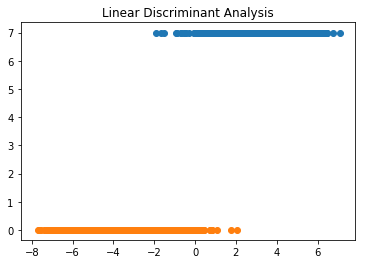

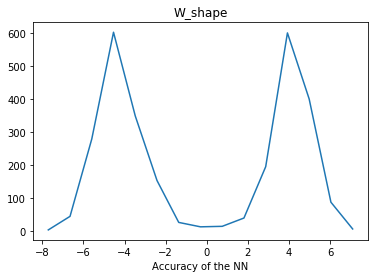

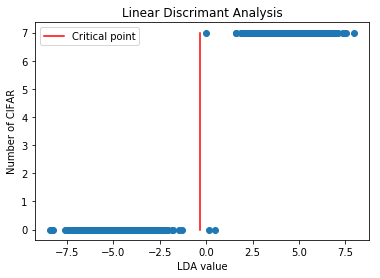

In [7]:
plt.figure()
plt.title('Linear Discriminant Analysis')
plt.scatter(X_lda[(y_m == number_1)], y_m[y_m == number_1]) 
plt.scatter(X_lda[(y_m == number_2)], y_m[y_m == number_2]) 

plt.figure()
plt.title('W_shape')
plt.xlabel('LDA value')
plt.xlabel('Accuracy of the NN')
plt.plot(values_c, acc)

plt.figure()
plt.title('Linear Discrimant Analysis')
plt.ylabel('Number of CIFAR')
plt.xlabel('LDA value')
plt.scatter(X_lda_test, y_test,)
plt.plot((critical_value, critical_value), (number_1, number_2), 'r-', label = 'Critical point')
plt.legend()